In [1]:
####Alright Dog, let's play with some iris shit!
#There are mulitple ways to load iris data.
#Such as in seaborn: iris = sns.load_dataset("iris")
#Here I load it from sklearn.datasets, where you can load other data too(use load_dataname)

from sklearn.datasets import load_iris
iris_data = load_iris() #it's a Bunch object containing keys and values, like a dict

In [2]:
#It took me a while to figure out what the data type is, what useful variables are. What a bitch!
#Should have done it with seaborn iris data ^_*
print("Iris_data keys():\n{}".format(iris_data.keys()))

print("feature_names:\n{}".format(iris_data.feature_names))
print("First 3 lines:\n{}".format(iris_data.data[:3]))
print("target_names:\n{}".format(iris_data.target_names))
print("target array:\n{}".format(iris_data.target[40:60]))

Iris_data keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
feature_names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
First 3 lines:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]
target_names:
['setosa' 'versicolor' 'virginica']
target array:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#Conversion functions: from array to pandas dataframe
#Now let's convert these numpy array data to 
#pandas dataframe for data wrangling, i.e. fancy analyses, which python itself lacks.

import pandas as pd
#Convert arrays to pandas dataframe and add column names
#It's easy to confuse pd.DataFrame(..., columns=...) with pd.read_csv(..., names=...), careful
iris_skl = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

#Add a new column
class_col = iris_data.target_names[iris_data.target]
#class_col = [ iris_data.target_names[x] for x in iris_data.target ]
#class_col = list(map(lambda x: iris_data.target_names[x], iris_data.target))

iris_skl['species'] = pd.Series(class_col)
#X.loc[:,'class'] = pd.Series(class_col) #equivalent as above, afaik

print("Shape of Data :{}".format(iris_skl.shape))
iris_skl.head()

#####TAnother way to import the data, from seaborn
##One-liner, Damn!
# import seaborn as sns
# iris_sns=sns.load_dataset("iris")
# print(iris_sns.shape)

In [269]:
print(iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


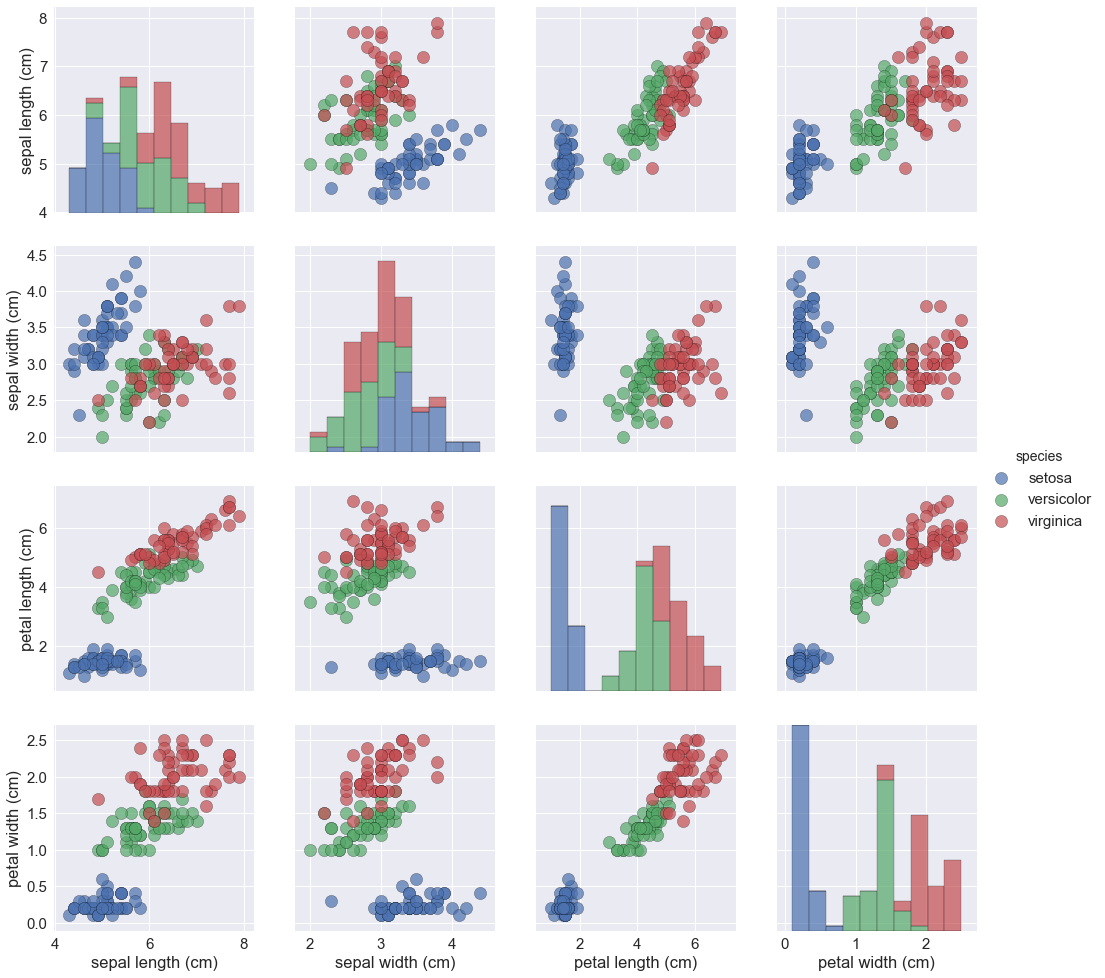

In [268]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(font_scale=1.5) #larger font

sns.pairplot(iris_skl,hue='species',size=3.5, diag_kws={'alpha':0.7, 'edgecolor':'k'},
             plot_kws={'s':150, 'alpha':0.7, 'edgecolor':'k'}
            )
#sns.pairplot(iris_sns,hue='species') #same as above

In [ ]:
%%time
#Classfication problem:
#Q: Given four measurements, can you predict its species?
#Don't bother using LogisticRegressionCV or cross_val_score
#Just keep it simple: GridSearchCV, including classifier, cross-validation and parameter search, THREE-IN-ONE!

x = iris_skl.values[:,:4]
y = iris_skl.species

from sklearn.model_selection import GridSearchCV

from sklearn.tree            import DecisionTreeClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier

classifier_1  = DecisionTreeClassifier()
params_1      = {'max_depth': [2, 3, 4, 5], 'max_features': [2, 3, 4]}

classifier_2  = LogisticRegression()
params_2      = {'C':[0.01, 0.1, 1, 10,100]}

classifier_3  = RandomForestClassifier()
params_3      = {'n_estimators': [5, 10, 25, 50], 'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],   'warm_start': [True, False]}

grid_1 = GridSearchCV(classifier_1, params_1, cv=5)
grid_2 = GridSearchCV(classifier_2, params_2, cv=5)
grid_3 = GridSearchCV(classifier_3, params_3, cv=5)

grid_1.fit(x, y)
grid_2.fit(x, y)
grid_3.fit(x, y)

print('Model 1 best score: {}'.format(grid_1.best_score_))
print('Model 2 best score: {}'.format(grid_2.best_score_))
print('Model 3 best score: {}'.format(grid_3.best_score_))

print('Model 1 best parameters: {}'.format(grid_1.best_params_))
print('Model 2 best parameters: {}'.format(grid_2.best_params_))
print('Model 3 best parameters: {}'.format(grid_3.best_params_))

#print(grid_1.score(x_test,y_test))
#print(grid_1.predict(x_test))

In [233]:
grid_1.predict(np.array([5.1, 3.5, 1.4, 0.2]).reshape(1,-1))

array(['setosa'], dtype=object)

In [246]:
x.shape, y.shape

((150, 4), (150,))

In [260]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

y_value = iris_data.target #xgb doesn't take strings
x1,x2,y1,y2 = train_test_split(x,y_value,test_size=0.2,random_state=1977)

dtrain = xgb.DMatrix(x1, y1)
dvalid = xgb.DMatrix(x2, y2)
watch_list = ([dtrain,'train'], [dvalid, 'valid'])

params_xgb = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
              'max_depth': 6, 'subsample': 0.9, 'lambda': 1., 'booster' : 'gbtree', 'silent': 1,
              'eval_metric': 'mlogloss', 'objective': 'multi:softmax', 'num_class': 3}

model_xgb = xgb.train(params_xgb, dtrain, 500, watch_list, early_stopping_rounds=20, verbose_eval=20 )

print("Model xgb best score:", model_xgb.best_score)
#print("Model xgb best parameter:", model_xgb.best_params)

[0]	train-mlogloss:0.554235	valid-mlogloss:0.541365
Multiple eval metrics have been passed: 'valid-mlogloss' will be used for early stopping.

Will train until valid-mlogloss hasn't improved in 20 rounds.
[20]	train-mlogloss:0.027383	valid-mlogloss:0.026609
[40]	train-mlogloss:0.020662	valid-mlogloss:0.017163
[60]	train-mlogloss:0.019291	valid-mlogloss:0.013938
[80]	train-mlogloss:0.018381	valid-mlogloss:0.013315
[100]	train-mlogloss:0.017908	valid-mlogloss:0.012642
Stopping. Best iteration:
[99]	train-mlogloss:0.017918	valid-mlogloss:0.012589

Model xgb best score: 0.012589
